## Hotel Booking 
<img src='https://www.murhotels.com/cache/40/b3/40b3566310d686be665d9775f59ca9cd.jpg' width='700'>

 # 1.. lets read data..

In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


# 2.. lets perform data cleaning..

In [5]:
df.shape

(119390, 32)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.drop(['agent','company'],axis=1,inplace=True)

In [8]:
df['country'].value_counts().index[0]

'PRT'

In [9]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [10]:
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time ..

### bcz if 3 entities are 0 ,then how can a booking be possible ??

In [13]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
data.shape

(119210, 30)

In [17]:
df.shape

(119390, 30)

In [18]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


# 3.. Where do the guests come from ?

In [19]:
## Lets perform Spatial Analysis

In [20]:
data['is_canceled'].unique()

array([0, 1])

In [21]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [22]:
len(data[data['is_canceled']==0])

75011

In [23]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [24]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [25]:
import plotly.express as px

In [26]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['country'],
              title='home country of guests'
             )

In [27]:
map_guest.show()

Conclusion : People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

# 4.. How much do guests pay for a room per night ?

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [28]:
data2=data[data['is_canceled']==0]

In [29]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

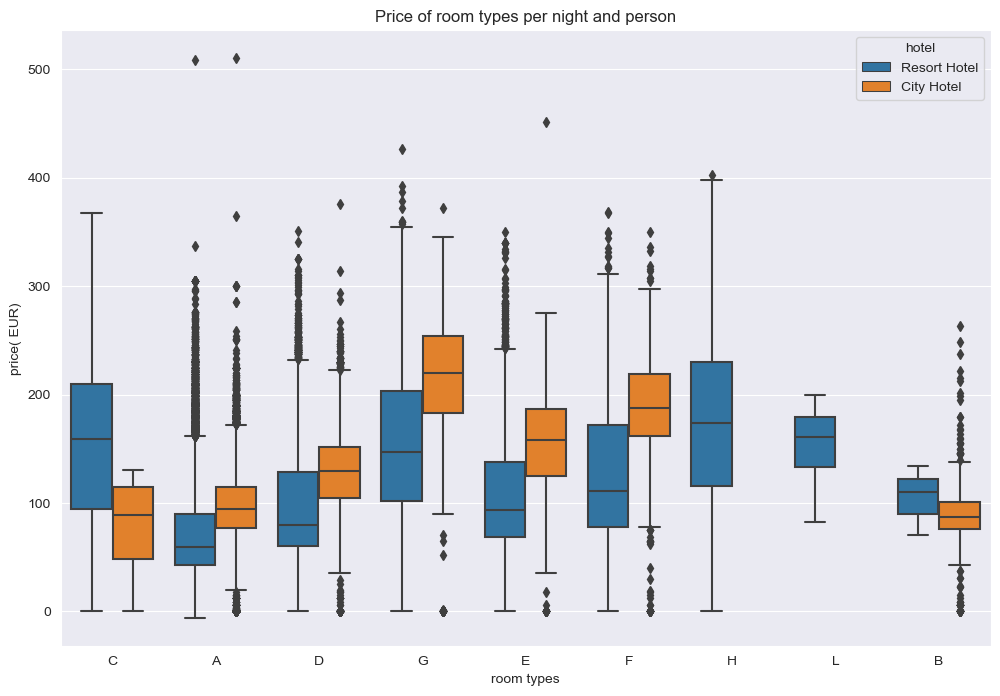

In [30]:
# seaborn boxplot:

plt.figure(figsize=(12,8));
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2);

plt.title('Price of room types per night and person');
plt.xlabel('room types');
plt.ylabel('price( EUR)');

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

# 5.. Which are the most busy month ?

In [31]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [33]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [34]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [35]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [36]:
final_rush=rush_resort.merge(rush_city,on='month')

In [37]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [38]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
so very first we have to provide right hierarchy to the month column

In [39]:
import sort_dataframeby_monthorweek as sd

In [40]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [41]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

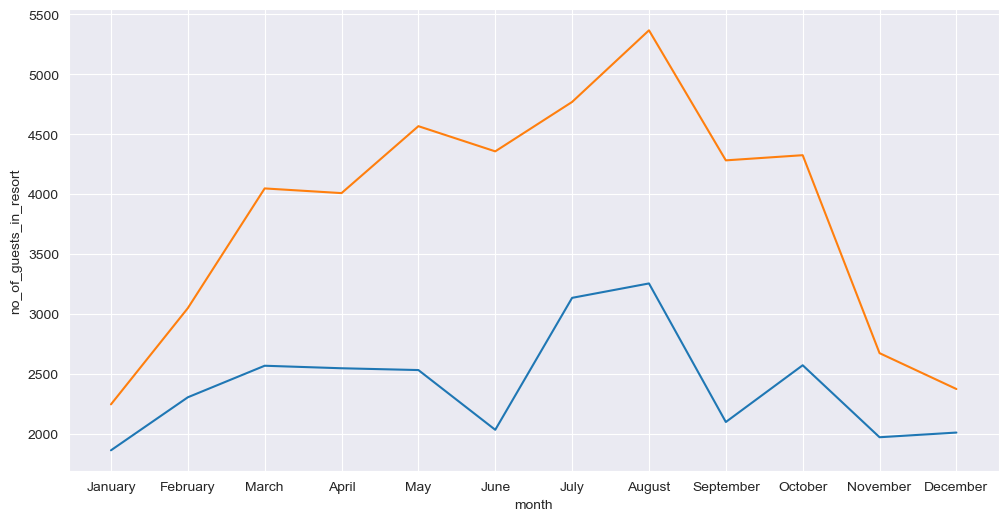

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(data=final_rush,x='month',y='no_of_guests_in_resort');
sns.lineplot(data=final_rush,x='month',y='no_of_guests_city');

Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

# 6.. which month has highest adr ?

In [43]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

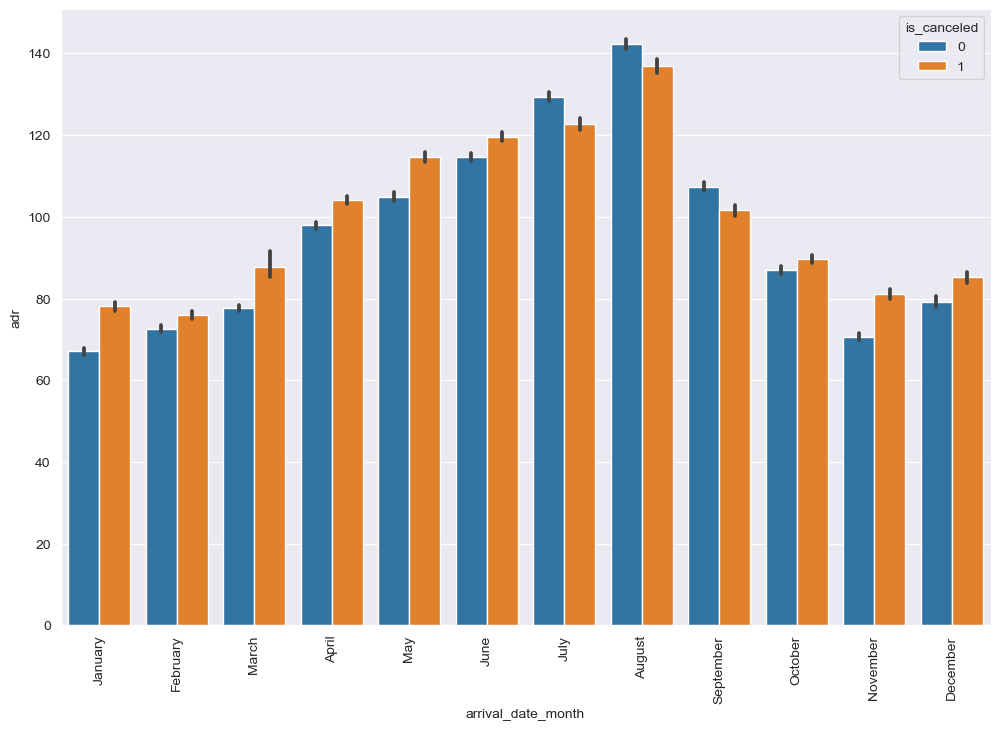

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

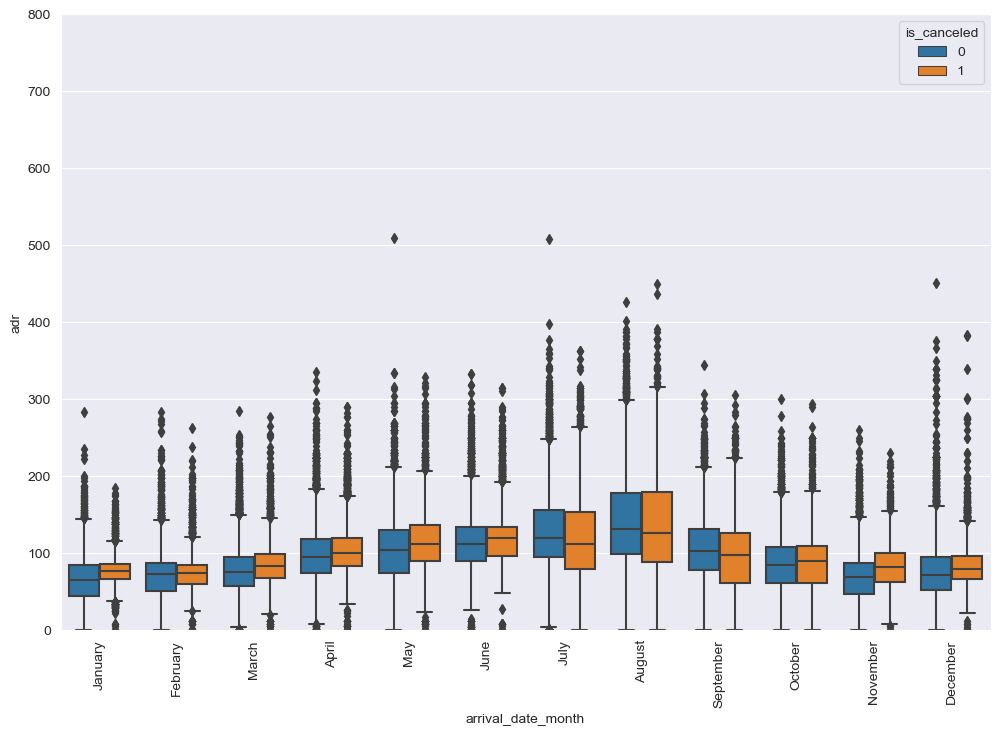

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

# 7.. Lets analyse whether bookings were made only for weekdays or for weekends or for both ??

In [46]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [47]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [49]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [50]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [51]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [52]:
type(sd)

module

In [53]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [54]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [55]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [56]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [57]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [58]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


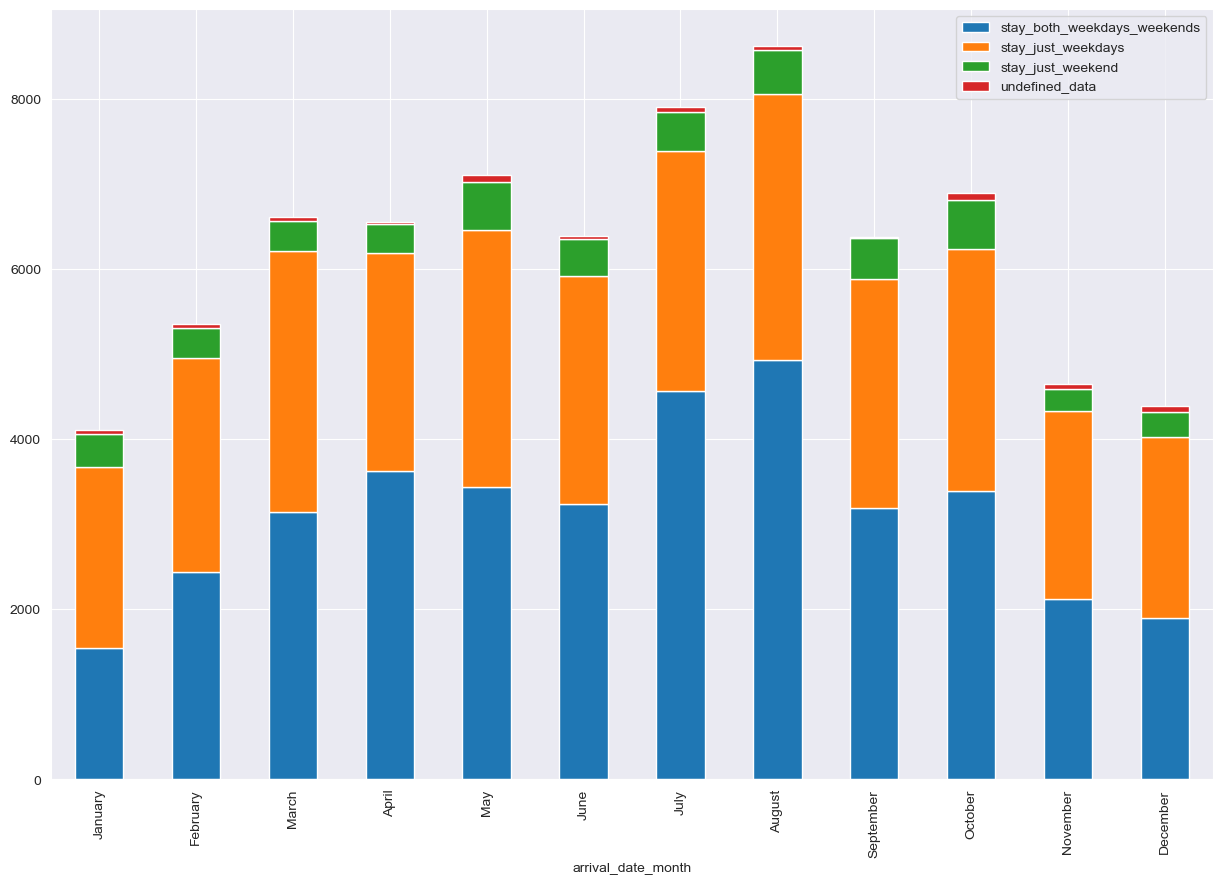

In [59]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10));

# 8.. How to create some more features ..

In [60]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [61]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [62]:
data['is_family']=data.apply(family,axis=1)

In [63]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [64]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [65]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [66]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [67]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [68]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [69]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [71]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [72]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# 9.. how to apply Feature encoding on data 

In [73]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [74]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [75]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [76]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [77]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [78]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [79]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [80]:
data_cat=data[cate_features]

In [81]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [82]:
data_cat['cancellation']=data['is_canceled']

In [83]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [84]:
cols=data_cat.columns

In [85]:
cols=cols[0:-1]

In [86]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [87]:
### Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [88]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


# 10.. Handle Outliers 

In [89]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [90]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [91]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [92]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [93]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


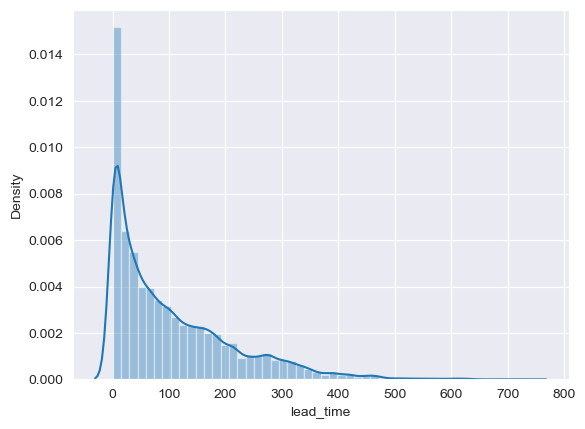

In [94]:
sns.distplot(dataframe['lead_time']);

In [95]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [96]:
handle_outlier('lead_time')

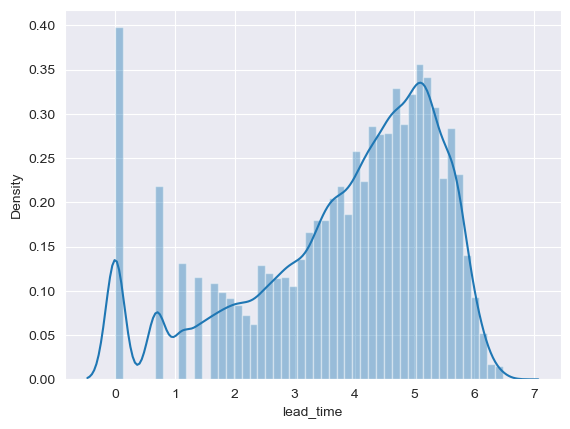

In [97]:
sns.distplot(dataframe['lead_time']);

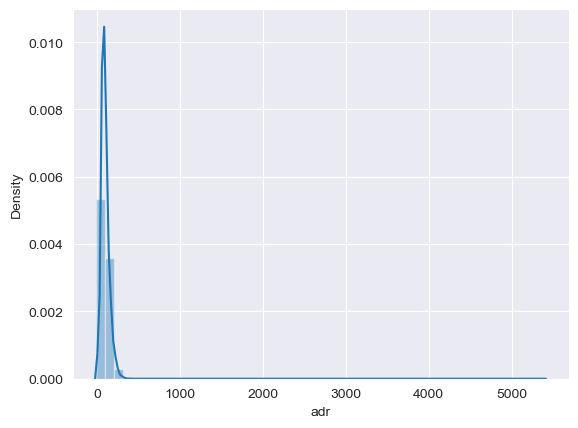

In [98]:
sns.distplot(dataframe['adr']);

In [99]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [100]:
handle_outlier('adr')

In [101]:
dataframe['adr'].isnull().sum()

1

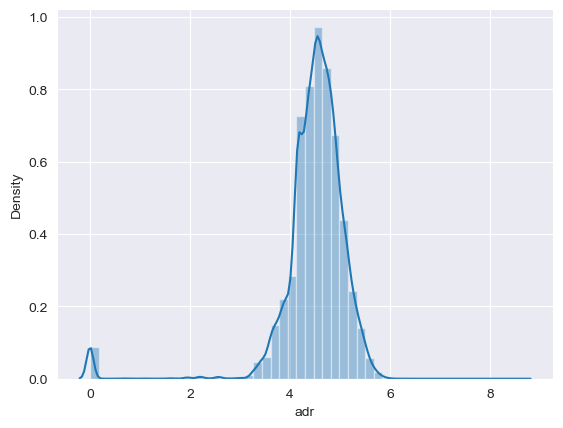

In [102]:
sns.distplot(dataframe['adr'].dropna());

# 11.. Select important Features using Co-relation & univariate analysis..

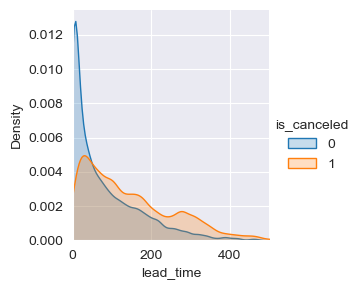

In [103]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend();

In [104]:
corr=dataframe.corr()

In [105]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [106]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [107]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [108]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [109]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [110]:
dataframe.shape

(119210, 24)

# 12.. How to find Important features for model building..

In [111]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [112]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [113]:
dataframe.dropna(inplace=True)

### Feature selection

In [114]:
## separate dependent & independent features

In [115]:
x=dataframe.drop('is_canceled',axis=1)

In [116]:
y=dataframe['is_canceled']

In [117]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [118]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [119]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [120]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [121]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [122]:
cols=x.columns

In [123]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [124]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [125]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [126]:
x=x[selected_feature]

In [127]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

# 13.. Lets build ML model..

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [130]:
X_train.shape

(89406, 12)

In [131]:
from sklearn.linear_model import LogisticRegression


In [132]:
logreg=LogisticRegression()

In [133]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [134]:
pred=logreg.predict(X_test)

In [135]:
pred

array([0, 0, 0, ..., 0, 1, 0])

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y_test,pred)

array([[17249,  1420],
       [ 4632,  6502]])

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_test,pred)

0.7969331946448344

# 14.. How to cross-validate model..

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
score=cross_val_score(logreg,x,y,cv=10)

In [142]:
score

array([0.77845818, 0.78424629, 0.78240081, 0.81410955, 0.81494841,
       0.73919973, 0.74146464, 0.8557168 , 0.83633923, 0.80469799])

In [143]:
score.mean()

0.7951581637277625

# 15.. playing with multiple algos..

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [146]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17249  4632]
 [ 1420  6502]]
0.7969331946448344


Naive_bayes
[[ 6628   681]
 [12041 10453]]
0.5731302217897527


Random Forest
[[17093  2748]
 [ 1576  8386]]
0.8549139348387746


Decision_tree
[[15911  2666]
 [ 2758  8468]]
0.8180048988356877


KNN
[[16708  3394]
 [ 1961  7740]]
0.8203201020031541


